# Dataset

https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000


Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: 
- Actinic keratoses and intraepithelial carcinoma / Bowen's disease (AKIEC), 
- basal cell carcinoma (BCC) 
- benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, BKL) 
- dermatofibroma (DF) 
- melanoma (MEL) 
- melanocytic nevi (NV) 
- vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, VASC).

The classes and the target labels have meen listed below

| Category                                                                                                      | Class ID |
|---------------------------------------------------------------------------------------------------------------|----------|
| melanoma (MEL)                                                                                                | 0        |
| melanocytic nevi (NV)                                                                                         | 1        |
| basal cell carcinoma (BCC)                                                                                    | 2        |
| Actinic keratoses and intraepithelial carcinoma / Bowen's disease (AKIEC)                                     | 3        |
| benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, BKL) | 4        |
| dermatofibroma (DF)                                                                                           | 5        |
| vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, VASC)                         | 6        |

# Classification features
The LBP calculated from the images are being used as features for image classification.

# Untransformed

Generating classification report and consufion matrix  of images that were not log transformed before segmentation

In [1]:
# @hidden_cell
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


2023-08-18 07:58:33.333442: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 07:58:33.354235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 07:58:33.391720: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-18 07:58:33.392376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 07:58:34.171399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
# @hidden_cell
# Specify the path to your pickle file
pickle_file_path = "./data/lbp_untransformed.pkl"
features = None
labels = None
data_untransformed= None
# Open and read the pickle file
with open(pickle_file_path, 'rb') as pickle_file:
    data_untransformed = pickle.load(pickle_file)


In [38]:
# @hidden_cell
my_dict_untransformed = dict(zip(data_untransformed['images'], data_untransformed['lbp']))


In [44]:
#my_dict_untransformed['ISIC_0024306'].shape
data_untransformed['lbp'][0].shape

(26,)

In [5]:
# @hidden_cell
df = pd.read_csv('GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_one_hot = df.loc[:,['MEL','NV','BCC','AKIEC','BKL','DF','VASC']].values
print(y_one_hot)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
np.unique(y_one_hot)

array([0., 1.])

In [7]:
# @hidden_cell
def preprocess_category(x):
    #print(x)
    if x['MEL']==1.0:
        return 'MEL'
    if x['NV']==1.0:
        return 'NV'
    if x['BCC']==1.0:
        return 'BCC'
    if x['AKIEC']==1.0:
        return 'AKIEC'
    if x['BKL']==1.0:
        return 'BKL'
    if x['DF']==1.0:
        return 'DF'
    if x['VASC']==1.0:
        return 'VASC'

In [8]:
# @hidden_cell
df['label']= df.apply(lambda x:preprocess_category(x),axis=1)
df['encoded'] = df.apply(lambda row:[row['MEL'],row['NV'],row['BCC'],row['AKIEC'],row['BKL'],row['DF'],row['VASC']],axis=1)
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,label,encoded
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [29]:
 # @hidden_cell   
def accumulator(feat,df):
    x = []
    label = []
    y = []
    for index, row in df.iterrows():
        
        x.append(feat[row['image']])
        label.append(row['label'])
        y.append(row['encoded'])
    return np.stack(x),np.array(y),np.array(label)

x,y,label = accumulator(my_dict_untransformed,df)
    

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(stacked_images[i])
    ax.axis('off')
    ax.set_title(f'Image {i + 1}')

plt.show()

(10015, 26)

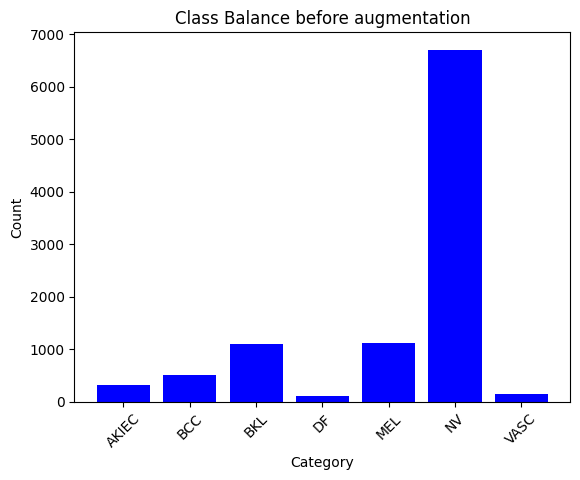

In [30]:
# Get unique elements and their counts
unique_elements, counts = np.unique(label, return_counts=True)

# Create a dictionary with element-count pairs
value_counts = dict(zip(unique_elements, counts))


# Extract keys (categories) and values (counts) from the dictionary
categories = list(value_counts.keys())
counts = list(value_counts.values())

# Plot the bar chart
plt.bar(categories, counts, color='blue')
plt.title('Class Balance before augmentation')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Print the value counts
#for element, count in value_counts.items():
#    print(f"{element}: {count}")

In [37]:
num_classes = len(np.unique(label))
#y_categorical = to_categorical(y, num_classes=num_classes)

# Count the number of samples in each class
class_counts = counts

# Determine the maximum class count
max_class_count = np.max(class_counts)
# Create an ImageDataGenerator for data augmentation
data_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Create a generator for each class
augmented_generators = []
for class_label in np.unique(label):
    class_indices = np.where(label == class_label)[0]
    print(x.shape)
    class_samples = x[class_indices]
    class_labels = y[class_indices]
    
    # Determine the augmentation factor based on the maximum class count
    augmentation_factor = max_class_count // len(class_samples)
    
    # Create an augmented generator for the class
    print(class_samples.shape)
    augmented_generator = data_gen.flow(
        class_samples, class_labels, batch_size=len(class_samples),
        save_to_dir=None, save_prefix='', save_format='png'
    )
    
    augmented_generators.append(augmented_generator)

# Combine the augmented generators for each class
combined_generator = np.concatenate(augmented_generators, axis=0)

# Shuffle the combined generator
np.random.shuffle(combined_generator)


(10015, 26)
(327, 26)


ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (327, 26))

## SVM classification
Train test split is 80% and 20% respectively.


### 10-fold cross validation

In [8]:
#@hidden_cell
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC()


# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(svm, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
svm.fit(x_train, y_train)

Fold 1: Accuracy = 0.67
Fold 2: Accuracy = 0.67
Fold 3: Accuracy = 0.68
Fold 4: Accuracy = 0.67
Fold 5: Accuracy = 0.67
Fold 6: Accuracy = 0.68
Fold 7: Accuracy = 0.68
Fold 8: Accuracy = 0.66
Fold 9: Accuracy = 0.66
Fold 10: Accuracy = 0.67
Mean Accuracy: 0.67


SVC()

### Confusion Matrix 

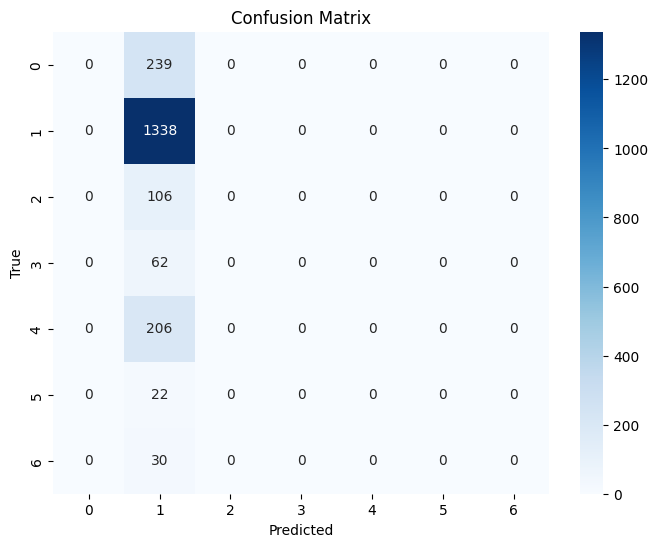

In [9]:
y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [10]:
# Extract True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) from confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 1.00
Specificity: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.67      1.00      0.80      1338
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00       206
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        30

    accuracy                           0.67      2003
   macro avg       0.10      0.14      0.11      2003
weighted avg       0.45      0.67      0.54      2003



/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forrest classifier
Train test split is 80% and 20% respectively.

### 10-fold cross validation 

In [11]:
rf = RandomForestClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(rf, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
rf.fit(x_train, y_train)

Fold 1: Accuracy = 0.68
Fold 2: Accuracy = 0.68
Fold 3: Accuracy = 0.69
Fold 4: Accuracy = 0.68
Fold 5: Accuracy = 0.69
Fold 6: Accuracy = 0.69
Fold 7: Accuracy = 0.70
Fold 8: Accuracy = 0.67
Fold 9: Accuracy = 0.65
Fold 10: Accuracy = 0.67
Mean Accuracy: 0.68


RandomForestClassifier()

### Confusion matrix

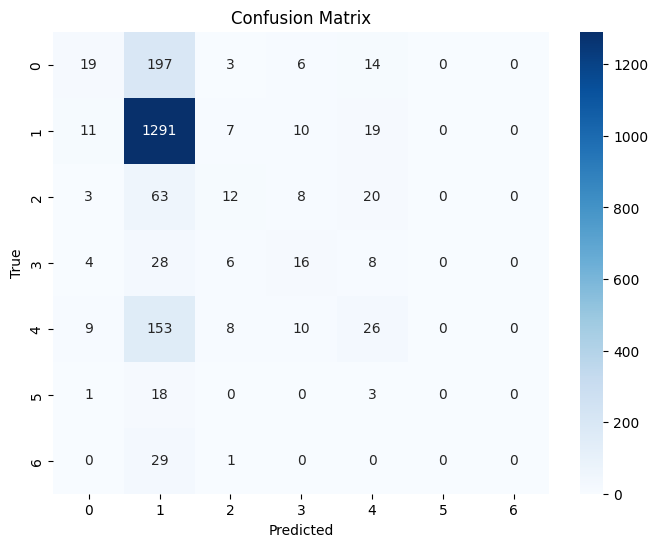

In [12]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [13]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 0.99
Specificity: 0.09
              precision    recall  f1-score   support

           0       0.40      0.08      0.13       239
           1       0.73      0.96      0.83      1338
           2       0.32      0.11      0.17       106
           3       0.32      0.26      0.29        62
           4       0.29      0.13      0.18       206
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        30

    accuracy                           0.68      2003
   macro avg       0.29      0.22      0.23      2003
weighted avg       0.59      0.68      0.60      2003



/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Adaboost

Train test split is 80% and 20% respectively.

### 10-fold cross validation

In [14]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(adaboost, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
adaboost.fit(x_train,y_train)

Fold 1: Accuracy = 0.60
Fold 2: Accuracy = 0.59
Fold 3: Accuracy = 0.68
Fold 4: Accuracy = 0.62
Fold 5: Accuracy = 0.68
Fold 6: Accuracy = 0.67
Fold 7: Accuracy = 0.55
Fold 8: Accuracy = 0.62
Fold 9: Accuracy = 0.64
Fold 10: Accuracy = 0.64
Mean Accuracy: 0.63


AdaBoostClassifier()

### Confusion Matrix

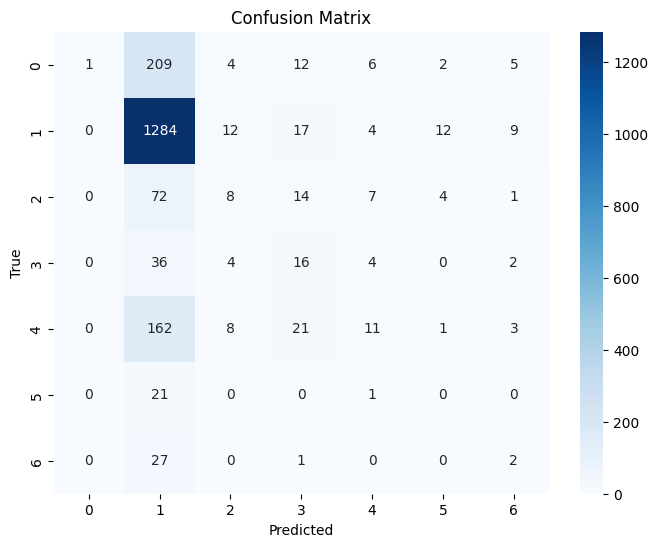

In [15]:
# Make predictions on the test set
y_pred = adaboost.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [16]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 1.00
Specificity: 0.00
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       239
           1       0.71      0.96      0.82      1338
           2       0.22      0.08      0.11       106
           3       0.20      0.26      0.22        62
           4       0.33      0.05      0.09       206
           5       0.00      0.00      0.00        22
           6       0.09      0.07      0.08        30

    accuracy                           0.66      2003
   macro avg       0.36      0.20      0.19      2003
weighted avg       0.65      0.66      0.57      2003



# Transformed
Generating classification report and consufion matrix  of images that were  log transformed before segmentation

In [17]:
pickle_file_path = "./lbp_transformed.pkl"
features = None
labels = None
data_transformed= None
# Open and read the pickle file
with open(pickle_file_path, 'rb') as pickle_file:
    data_transformed = pickle.load(pickle_file)


In [18]:
my_dict_transformed = dict(zip(data_transformed['images'], data_transformed['lbp']))

In [19]:
# @hidden_cell
df = pd.read_csv('GroundTruth.csv')
#df.head()

In [20]:
def preprocess_category(x):
    #print(x)
    if x['MEL']==1.0:
        return 0
    if x['NV']==1.0:
        return 1
    if x['BCC']==1.0:
        return 2
    if x['AKIEC']==1.0:
        return 3
    if x['BKL']==1.0:
        return 4
    if x['DF']==1.0:
        return 5
    if x['VASC']==1.0:
        return 6

In [21]:
# @hidden_cell
df['label']= df.apply(lambda x:preprocess_category(x),axis=1)

In [22]:
 # @hidden_cell   
def accumulator(feat,df):
    x = []
    y = []
    for index, row in df.iterrows():
        
        x.append(feat[row['image']])
        y.append(row['label'])
    return x,y

x,y = accumulator(my_dict_transformed,df)
    

## SVM classification
Train test split is 80% and 20% respectively.


### 10-fold cross validation

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC()
# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(svm, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
svm.fit(x_train, y_train)

Fold 1: Accuracy = 0.67
Fold 2: Accuracy = 0.67
Fold 3: Accuracy = 0.68
Fold 4: Accuracy = 0.67
Fold 5: Accuracy = 0.67
Fold 6: Accuracy = 0.68
Fold 7: Accuracy = 0.68
Fold 8: Accuracy = 0.66
Fold 9: Accuracy = 0.66
Fold 10: Accuracy = 0.67
Mean Accuracy: 0.67


SVC()

### confusion Matrix 

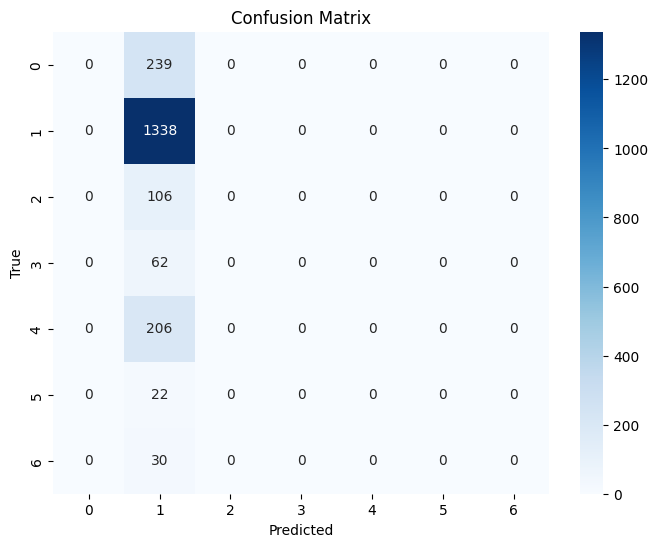

In [24]:
y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [25]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 1.00
Specificity: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.67      1.00      0.80      1338
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00       206
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        30

    accuracy                           0.67      2003
   macro avg       0.10      0.14      0.11      2003
weighted avg       0.45      0.67      0.54      2003



/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forrest classifier

### 10-fold cross validation

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(rf, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")



Fold 1: Accuracy = 0.68
Fold 2: Accuracy = 0.69
Fold 3: Accuracy = 0.70
Fold 4: Accuracy = 0.68
Fold 5: Accuracy = 0.69
Fold 6: Accuracy = 0.68
Fold 7: Accuracy = 0.69
Fold 8: Accuracy = 0.68
Fold 9: Accuracy = 0.68
Fold 10: Accuracy = 0.67
Mean Accuracy: 0.68


### Confusion Matrix

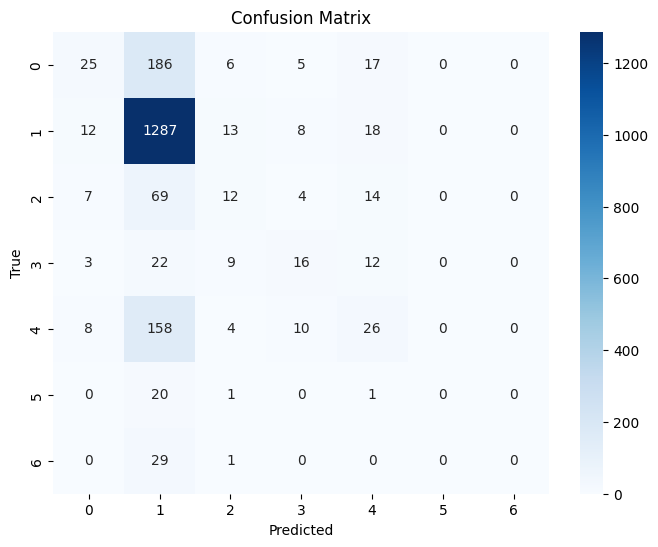

In [27]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [28]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 0.99
Specificity: 0.12
              precision    recall  f1-score   support

           0       0.45      0.10      0.17       239
           1       0.73      0.96      0.83      1338
           2       0.26      0.11      0.16       106
           3       0.37      0.26      0.30        62
           4       0.30      0.13      0.18       206
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        30

    accuracy                           0.68      2003
   macro avg       0.30      0.22      0.23      2003
weighted avg       0.60      0.68      0.61      2003



/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Adaboost
Train test split is 80% and 20% respectively.

### 10-fold cross validation

In [29]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(adaboost, x, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for fold, score in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
adaboost.fit(x_train,y_train)

Fold 1: Accuracy = 0.65
Fold 2: Accuracy = 0.66
Fold 3: Accuracy = 0.66
Fold 4: Accuracy = 0.67
Fold 5: Accuracy = 0.65
Fold 6: Accuracy = 0.66
Fold 7: Accuracy = 0.64
Fold 8: Accuracy = 0.64
Fold 9: Accuracy = 0.65
Fold 10: Accuracy = 0.63
Mean Accuracy: 0.65


AdaBoostClassifier()

### Confusion Matrix

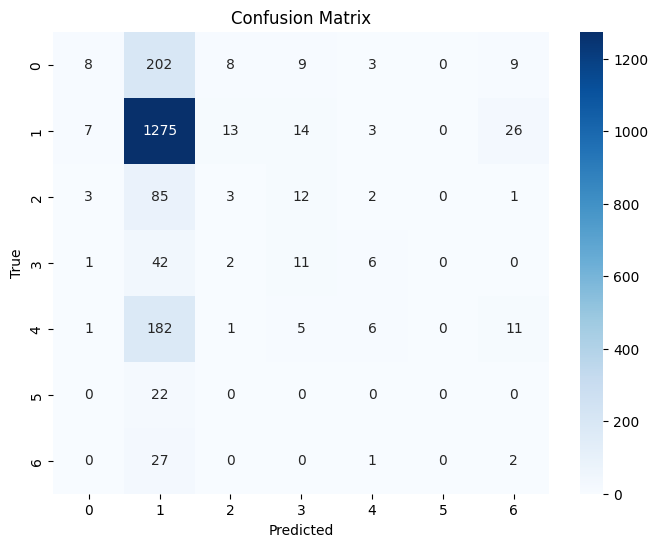

In [30]:
# Make predictions on the test set
y_pred = adaboost.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classification report

In [31]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Sensitivity: 0.99
Specificity: 0.04
              precision    recall  f1-score   support

           0       0.40      0.03      0.06       239
           1       0.69      0.95      0.80      1338
           2       0.11      0.03      0.05       106
           3       0.22      0.18      0.19        62
           4       0.29      0.03      0.05       206
           5       0.00      0.00      0.00        22
           6       0.04      0.07      0.05        30

    accuracy                           0.65      2003
   macro avg       0.25      0.18      0.17      2003
weighted avg       0.55      0.65      0.56      2003



/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajdeep/projects/en/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
